#### Stock market analysis 
Plotting different graphs, getting insights from powerful visualization using Matplotlib

Dataset description: We will use the Dow Jones Industrial Average (DJIA) index's historical prices from 2024-01-04 to 2024-12-06.(YYYY-MM-DD)

For visualization : we will use Matplotlib library for creating great-loking visualization. It is a very flexible and customizable for creating plots.

**Data visualization is an essential skill for all data analysts and Matplotlib is one of the powerful libraries for creating visualization.

### Load the dataset

In [1]:
import pandas as pd 
import numpy as np 


stock_data = pd.read_csv('HistoricalPrices.csv')
stock_data.head()

,Date,Open,High,Low,Close
0,06/26/24,39063.15,39183.74,38908.99,39127.80
1,06/25/24,39398.79,39423.26,38997.23,39112.16
2,06/24/24,39184.49,39571.23,39184.49,39411.21
3,06/21/24,39208.51,39257.18,39061.67,39150.33
4,06/20/24,38804.73,39232.50,38778.46,39134.76


In [2]:
print('Number of rows: ',stock_data.shape[0],'\nNumber of columns: ',stock_data.shape[1])

Number of rows:  61 
Number of columns:  5


Column Info-The dataset include 4 columns:
<br>Date: the day that the stock price information represents.
<br>open: the price when the stock market opens.
<br>High: the highest price reached during the day.
<br>Low: the lowest price reached during the day
<br>Close: the price when the market stop trading

### Data Cleaning and transformation

In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1    Open   61 non-null     float64
 2    High   61 non-null     float64
 3    Low    61 non-null     float64
 4    Close  61 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.5+ KB


In [4]:
#the column name contain leading spaces let's clean it
stock_data = stock_data.rename(columns={' Open':'Open',' High':'High',' Low':'Low',' Close':'Close'})

In [5]:

stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values(by='Date').reset_index(drop=True)

C:\Users\207498\AppData\Local\Temp\ipykernel_18784\4046439015.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [6]:
print('Start Date: ',stock_data['Date'].iloc[0],'\nEnd Date: ',stock_data['Date'].iloc[-1])

Start Date:  2024-04-01 00:00:00 
End Date:  2024-06-26 00:00:00


### Plotting

<b>Line Plot</b>
<br>Line plots are very important plot type, it helps to display time series data. It often plays a pivotal role to visualize how KPIs(Key Performance Indicators) changes over time to understand patterns in data that can be actioned on.

In [7]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from datetime import datetime

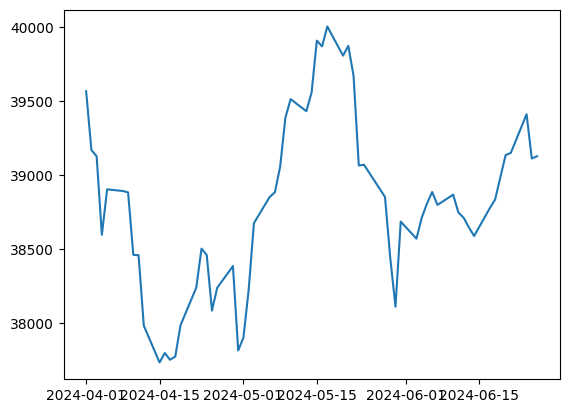

In [8]:
#Line plots with a single Line
plt.plot(stock_data['Date'],stock_data['Close'])
plt.show()

From this analysis, we can see that over the course of year, the index price fluctuated. we see the price was highest around May. There is no significant pattern in the price.

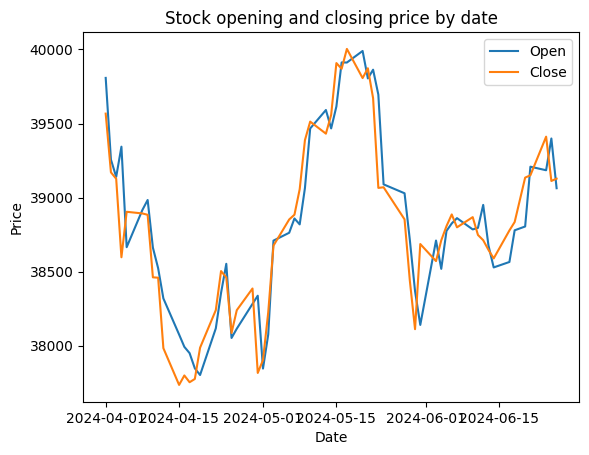

In [9]:
#Line plots with multiple lines
plt.plot(stock_data['Date'],stock_data['Open'],label='Open')
plt.plot(stock_data['Date'],stock_data['Close'],label='Close')
#adding legends
plt.legend() 
'''legend with the specified label appear in the default location
in the top right (location can be specified using the loc argument in the plt.legend())
plt.legend(loc='upper left') #[upper right, best, upper left, center, etc]
   '''
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock opening and closing price by date')         
plt.show()

Over the course of the year, we see that the open and close price of the stock were relatively close to each other for each given day with no clear pattern of one always being above the other.

<b>Few More attributes for line plots</b>
<br>Setting the line width plt.plot(dates,closing_price,linewidth=3) linewidth
<br>setting the line style: linestyle='dotted' [solid(default),dashed,dashdot,loosely dashed, densely dashed]
<br>Adding markers to line plots: marker='x'
<br>For grid line : plt.grid(True)


<b>Line plots with Twin Axe</b>
<br>To create a line plot with twin axes, we need to use the twinx() function. This function creates a new y-axis that shares the same x-axis as the original plot. 

<b>Creating subplots</b>
<br>fig, axs = plt.subplots(nrows,ncols)
<br>nrows: is the number of rows in the grid
<br>ncols: is the number of columns in the grid
<br>fig: is the figure objeect
<br>axs: is an array of Axes object
<br>The function is a verstile way to create a grid of subplots. 
<hr>
<br>fig, axs = plt.subplots(nrows,ncols)
<br>axs[row,col].plot(x,y) #x,y are the data points and row,col specify the position in the grid
<br>axs[row,col].set_title('Title')
<br>axs[row,col].set_xlabel('X-axis Label')
<br>axs[row,col].set_ylabel('Y-axis Label)
<br>plt.tight_layout() #adjust layout
<br>plt.show()

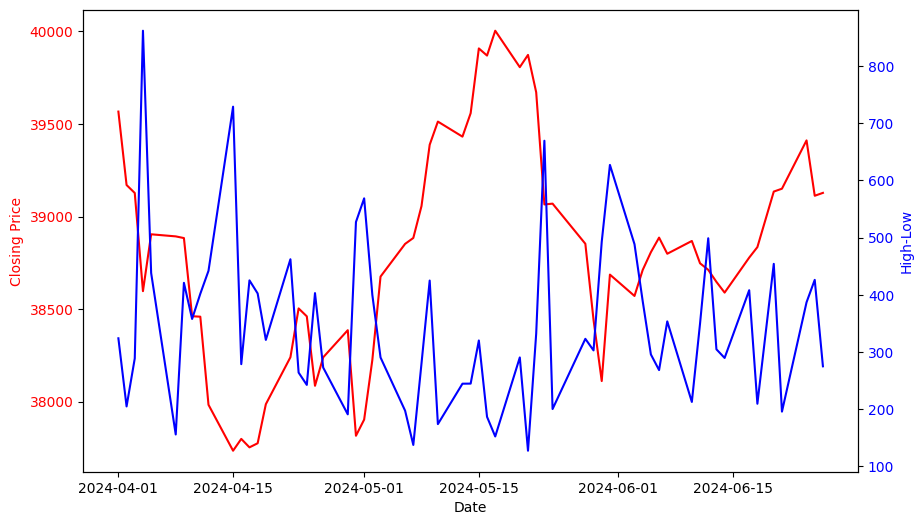

In [19]:
stock_data['High-Low'] = stock_data['High']-stock_data['Low']

#lets create a plot for the close price
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(stock_data['Date'],stock_data['Close'],label='Close Price',color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price',color='red')
ax1.tick_params(axis='y',labelcolor='red')

#create a twin axis for the high-low variable ie, another axis within the same plot

ax2 = ax1.twinx()
ax2.plot(stock_data['Date'],stock_data['High-Low'],label='high-low',color='blue')
ax2.set_ylabel('High-Low',color='blue')
ax2.tick_params(axis='y',labelcolor='blue')
plt.show()


<b>Drawing Bar Plots</b>
<br>Bar plots are very useful for comparing numerical values across categories.


In [63]:
''' 
Let's Aggregate the data into monthly averages.
We can compare the monthly performance during 2024
'''
from calendar import month_name
import warnings
warnings.filterwarnings('ignore') #for supressing warning

#order by months by chronological order
stock_data['Month'] = pd.Categorical(stock_data['Date'].dt.month_name(),month_name[1:])

#Group metrics by monthly averages
stock_data_mean = stock_data.drop('Date',axis=1).groupby('Month').mean().round(decimals=3).reset_index()

stock_data_mean


,Month,Open,High,Low,Close
0,January,38826.745,39082.100,38635.880,38735.070
1,February,38665.960,38775.780,38473.680,38697.950
2,March,38852.980,38949.963,38594.210,38791.283
3,April,38238.644,38400.710,37988.699,38149.250
4,May,39289.534,39430.808,39103.019,39253.738
5,June,38890.665,39058.436,38748.125,38956.720
6,July,38860.090,39041.420,38796.125,38841.625
7,August,38867.660,39053.970,38836.345,38974.595
8,September,39023.965,39203.275,38780.470,39135.715
9,October,38971.233,39040.007,38792.123,38947.463


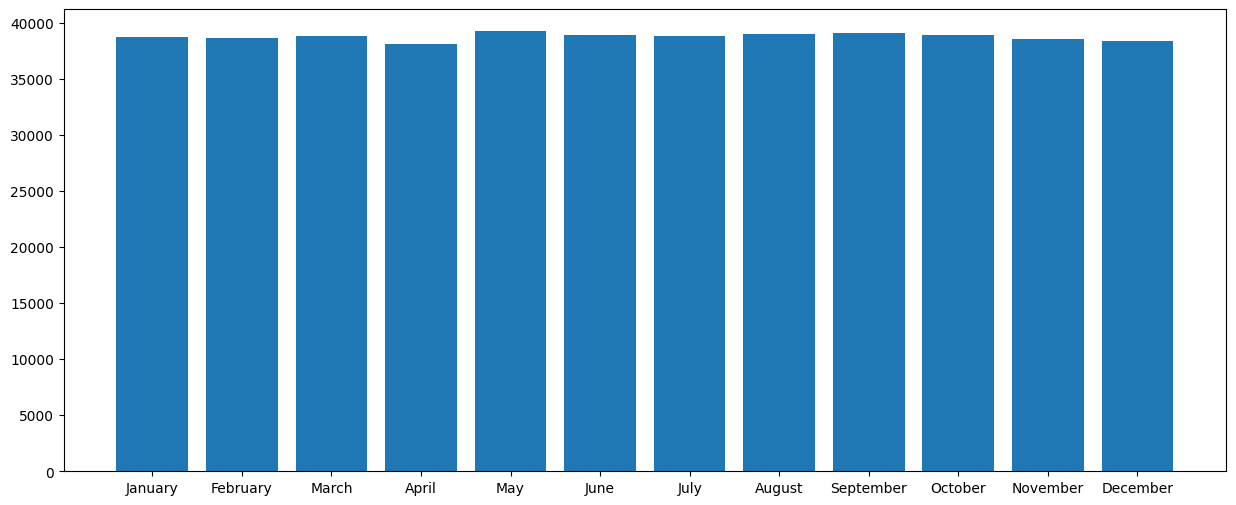

In [67]:
#Vertical bar plot
plt.figure(figsize=(15,6))
plt.bar(stock_data_mean['Month'],height=stock_data_mean['Close'])
plt.show()

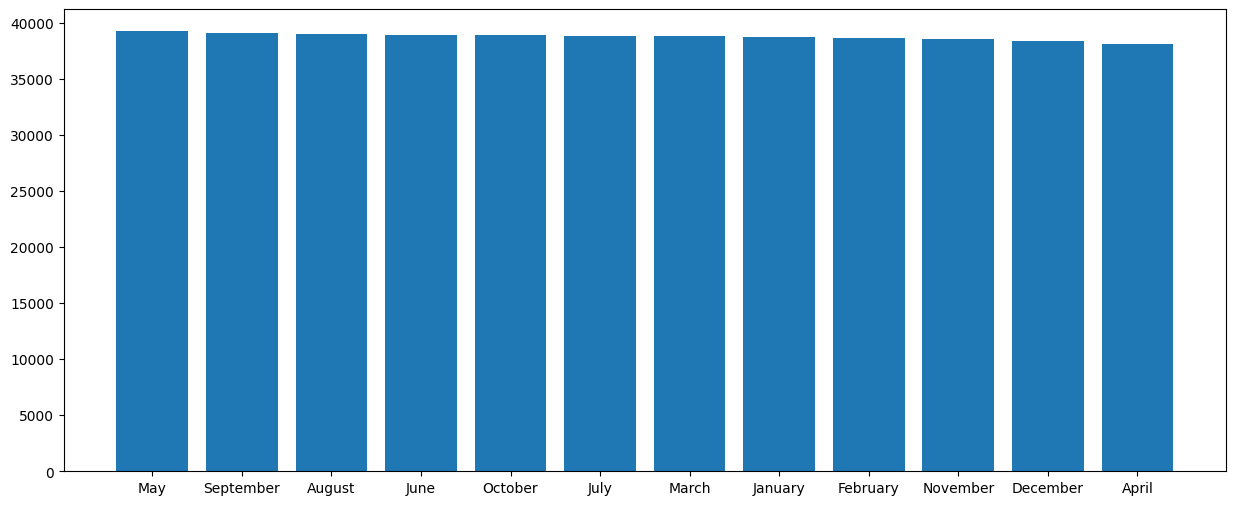

In [69]:
#lets reorder the bars for better understanding
#showing bars in order of highest to lowest monthly average close price.
plt.figure(figsize=(15,6))
stock_data_mean_sort = stock_data_mean.sort_values(by='Close',ascending=False)
plt.bar(stock_data_mean_sort['Month'],height=stock_data_mean_sort['Close'])
plt.show()

We can see that most of the Close price were close to each other with the lowest average close value being in April and the highest average close value being May.
It is significantly easier to see which months had the highest average and lowest averages. It is also easier to compare across the months and rank the months.

<b>For Horizontal Bar: plt.barh(stock_data_mean_sort['Month'],height=stock_data_mean_sort['Close'])</b>

<b>Drawing Scatter plots</b>
<br> Scatterplots are very useful for identifying relationships between 2 numeric variable "What to expect in a variable when the other variable changes and can also be very informative"

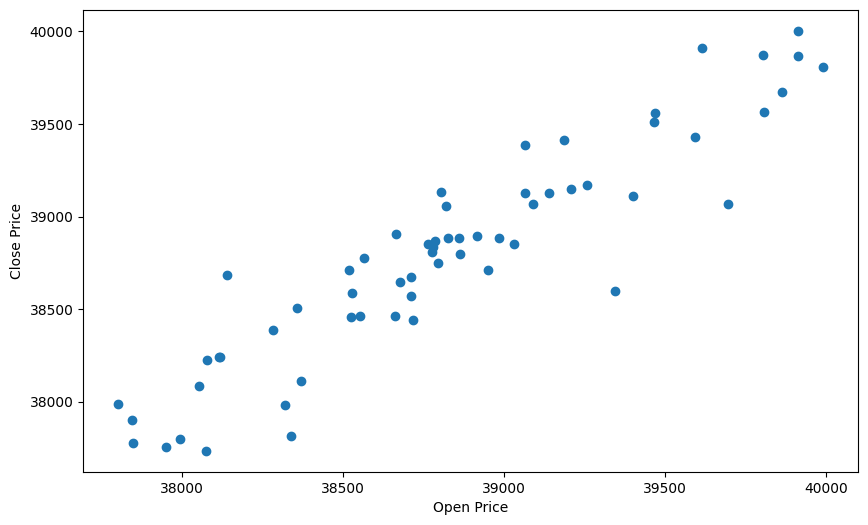

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(stock_data['Open'],stock_data['Close'])
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

As we would expect, as the open price increases, we see a relationship in the close price increasing as well.

<b> Scatter plot with a trend line </b>
<br>we will add a trend line to show linear relationship more explicitly among the variables.

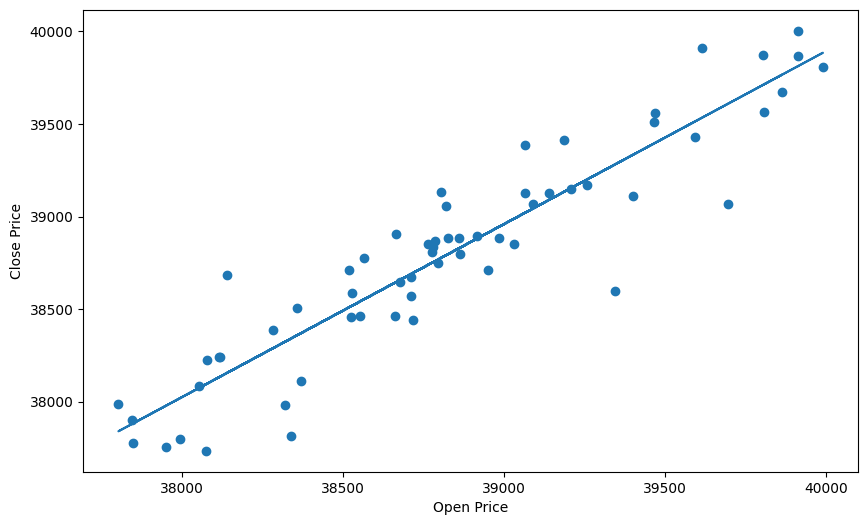

In [74]:
z = np.polyfit(stock_data['Open'],stock_data['Close'],1) #it will give us least square polynomial fit np.ployfit(x,y,degree) -- 1 for linear
p = np.poly1d(z) #it gives us 1-dimensional polynomial class that we can create a trend line using plt.plot()

plt.figure(figsize=(10,6))
plt.scatter(stock_data['Open'],stock_data['Close'])
plt.plot(stock_data['Open'],p(stock_data['Open']))
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

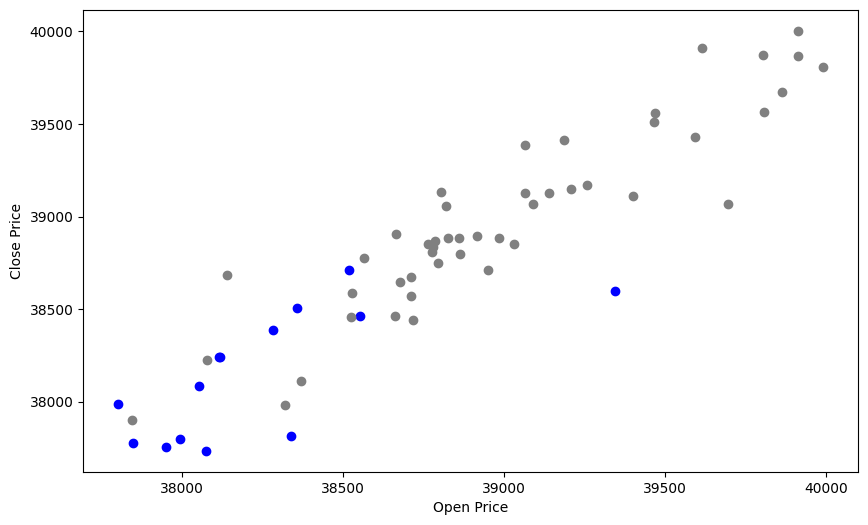

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(stock_data[stock_data['Month']=='April']['Open'],stock_data[stock_data['Month']=='April']['Close'],color='blue')
plt.scatter(stock_data[stock_data['Month']!='April']['Open'],stock_data[stock_data['Month']!='April']['Close'],color='grey')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

In [47]:
stock_data.head(10)

,Date,Open,High,Low,Close,Month
0,2024-01-04,39807.93,39815.00,39491.22,39566.85,January
1,2024-01-05,37845.56,38349.20,37780.54,37903.29,January
2,2024-02-04,39256.27,39256.27,39051.70,39170.24,February
3,2024-02-05,38075.65,38295.29,37895.66,38225.66,February
4,2024-03-04,39139.59,39305.76,39017.13,39127.14,March
5,2024-03-05,38709.36,38808.52,38518.28,38675.68,March
6,2024-03-06,38709.99,38735.61,38247.22,38571.03,March
7,2024-04-04,39343.60,39421.35,38559.42,38596.98,April
8,2024-04-06,38518.86,38786.62,38397.82,38711.29,April
9,2024-04-15,38075.38,38386.81,37657.79,37735.11,April
